# **_Using the Gram-Schmidt Procedure to Create an Orthogonal Matrix:_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Intro:_**

This notebook demonstrates concepts from a coding challenge I studied in Mike X. Cohen's Linear Algebra course on Udemy.

Essentially, this is my homework, which serves as a step-by-step review and a future quick-reference.

Visit Dr. Cohen's course here:

-   Udemy course: https://www.udemy.com/course/linear-algebra-theory-and-implementation

-   Professor Cohen's website: https://www.mikexcohen.com/

This course has not only helped me learn more about Linear Algebra, but has significantly improved my coding skills.

I'm still moving forward, slowly, toward the goal of contributing to the AI Safety conversation.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Goal:_**


Write code to implement the Gram-Schmidt Procedure to transform a given matrix into orthogonal form.

Compare and verify with NumPy's `np.linalg.qr()`.


<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Algebra Review:_**

### **_Creating Vector Components:_**

Given a vector to orthogonalize:

$
\LARGE
    \mathbf{v}
$

Equation to get component of $\mathbf{v}$ parallel to a reference vector $\mathbf{w}$:

$
\LARGE
    \mathbf{v}_{\parallel \mathbf{w}} = \frac{\mathbf{v}^T \mathbf{w}}{\mathbf{w}^T \mathbf{w}} \mathbf{w}
$

_or:_

$
\LARGE
   \mathrm{proj}_{\mathbf{w}} \mathbf{v} = \frac{\mathbf{v}^T \mathbf{w}}{\mathbf{w}^T \mathbf{w}} \mathbf{w}
$

Subtract $\mathbf{v}_{\parallel \mathbf{w}}$ from $\mathbf{v}$ to get the orthogonal component:

$
\LARGE
    \mathbf{v}_{\perp \mathbf{w}} = \mathbf{v} - \frac{\mathbf{v}^T \mathbf{w}}{\mathbf{w}^T \mathbf{w}} \mathbf{w}
$

_or:_

$
\LARGE
    \mathbf{v}_{\perp \mathbf{w}} = \mathbf{v} - \mathbf{v}_{\parallel \mathbf{w}}
$

_or simply:_

$
\LARGE
    \mathbf{v}_{\perp \mathbf{w}} = \mathbf{v} - \mathrm{proj}_{\mathbf{w}} \mathbf{v}
$

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">


### **_The Gram-Schmidt Procedure:_**

Takes an input matrix and outputs an orthogonal matrix, all column vectors pairwise orthogonal.

Ensure ensuing columns are all pairwise orthogonal by progressing through the column vectors and applying:

$$
\LARGE
\begin{gathered}
    \mathbf{q}_1 = \mathbf{a}_1

    \\ \\

    \mathbf{q}_2 = \mathbf{a}_2 - \mathrm{proj}_{\mathbf{q}_1} \mathbf{a}_2

    \\ \\

    \mathbf{q}_3 = \mathbf{a}_3 - \mathrm{proj}_{\mathbf{q}_1} \mathbf{a}_3 - \mathrm{proj}_{\mathbf{q}_2} \mathbf{a}_3

    \\ \\

    \mathbf{q}_4 = \mathbf{a}_4 - \mathrm{proj}_{\mathbf{q}_1} \mathbf{a}_4 - \mathrm{proj}_{\mathbf{q}_2} \mathbf{a}_4 - \mathrm{proj}_{\mathbf{q}_3} \mathbf{a}_4

    \\ \\

    \mathbf{q}_n = \mathbf{a}_n - \mathrm{proj}_{\mathbf{q}_1} \mathbf{a}_n - \cdots - \mathrm{proj}_{\mathbf{q}_{n-1}} \mathbf{a}_n
\end{gathered}
$$

_Key:_

$
\mathbf{a}_n \Leftarrow \text{column } n \text{ from input matrix } \mathbf{A}
$

$
\mathbf{q}_n \Leftarrow \text{column } n \text{ orthogonalized vector before normalization }
$

After orthogonalizing each column $i$, divide by its magnitude to normalize to unit length:

$
\LARGE
    \hat{\mathbf{q}}_i = \frac{\mathbf{q}_i}{\left\Vert \mathbf{q}_i \right\Vert}
$

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Code:_**


In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Matrix dimensions:
m_rows = 5
n_cols = 5

# Generate random normal matrix:
A = np.random.randn(m_rows, n_cols)

# Initialize matrix Q with zeros, same shape as A:
Q = np.zeros_like(A)

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">


#### **_Visualize Creation of $Q$ and Its Orthonormal Columns:_**

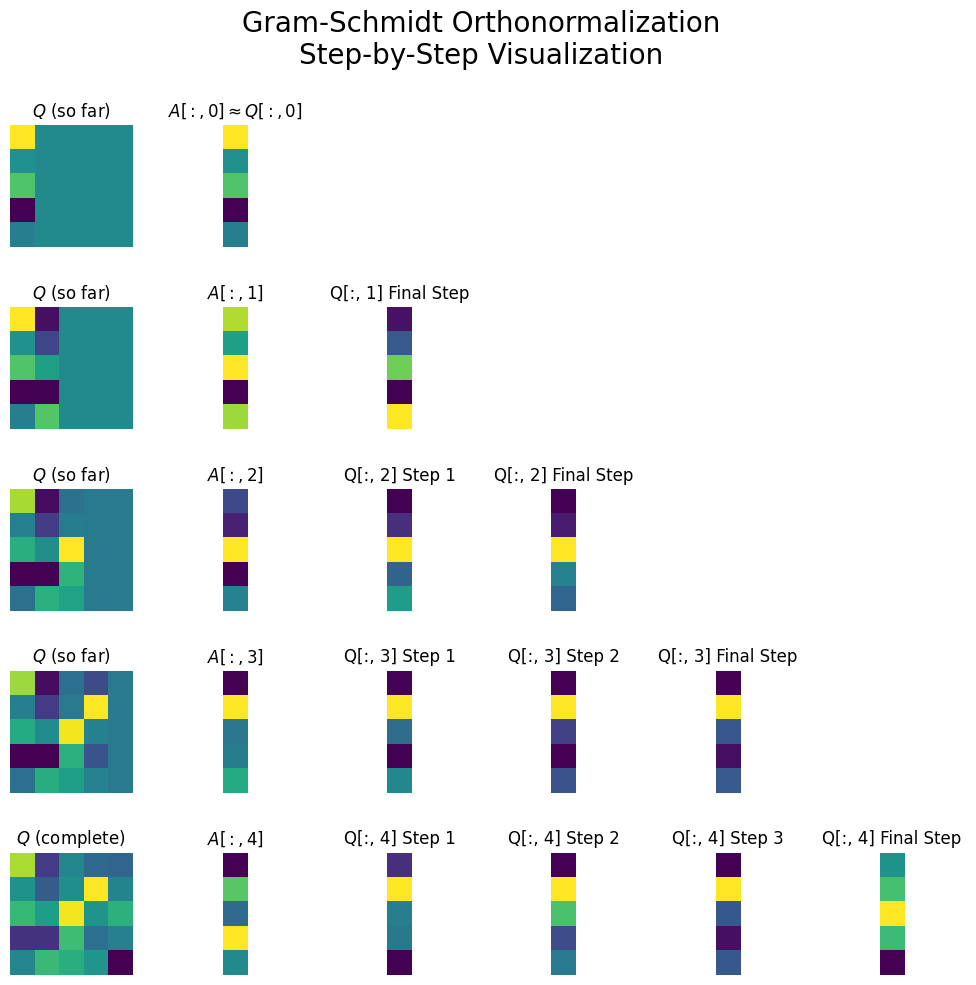

In [38]:
# Each row shows current Q matrix at col 0. Columns 1+
#  show the step-by-step construction of Q[:, i]:
fig, axes = plt.subplots(n_cols, n_cols + 1, figsize=(m_rows * 2, n_cols * 2))

for i in range(n_cols):
    # Begin with i-th column of original matrix A:
    col_to_compute = A[:, i]

    # Column 1: original unprocessed A[:, i]:
    axes[i][1].imshow(col_to_compute.reshape(-1, 1), cmap='viridis')
    init_col_title = f"\n$A[:, {i}]$"
    if i == 0:
        init_col_title += f"$ \\approx Q[:, {i}]$"
    axes[i][1].set_title(init_col_title)

    # Progressively subtract parallel vectors onto previously
    #  computed Q column vectors:
    for j in range(i):
        # j-th orthonormal reference vector:
        ref_col = Q[:, j]

        # Compute projection of col_to_compute onto ref_col:
        proj_onto_qj = np.dot(col_to_compute, ref_col) / np.dot(ref_col, ref_col) * ref_col

        # Subtract projection to get orthogonal component:
        col_to_compute -= proj_onto_qj

        # Display the intermediate state to see the building process:
        axes[i][j + 2].imshow(col_to_compute.reshape(-1, 1), cmap='viridis')
        step_title = f"\nQ[:, {i}]"
        if j == i - 1:
            step_title += " Final Step"
        else:
            step_title += f" Step {j + 1}"
        axes[i][j + 2].set_title(step_title)

    # Normalize the computed vector to unit length
    #  to ensure Q remains an orthonormal matrix:
    col_to_compute = col_to_compute / np.linalg.norm(col_to_compute)

    # Store in orthogonal matrix Q:
    Q[:, i] = col_to_compute

    # Show current state of matrix Q:
    axes[i][0].imshow(Q, cmap='viridis')
    if i == n_cols - 1:
        q_title = "\n$Q$ (complete)"
    else:
        q_title = "\n$Q$ (so far)"
    axes[i][0].set_title(q_title)

# Remove axis ticks, borders and labels from
#  subplots for cleaner visualization:
for axis in axes.ravel():
    axis.set_axis_off()

# Add title:
fig.suptitle("Gram-Schmidt Orthonormalization\nStep-by-Step Visualization", fontsize=20)

# Clean up and space the layout:
fig.tight_layout()

# Show it:
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">


#### **_Compare Manual Gram-Schmidt Build With `np.linalg.qr()` Version:_**

Manual G-S Q and np.linalg.qr(), rounded for visual inspection:
[[ 0.69 -0.59 -0.07 -0.28 -0.31]
 [ 0.04 -0.36  0.01  0.93 -0.07]
 [ 0.33  0.12  0.9   0.05  0.27]
 [-0.64 -0.63  0.36 -0.23 -0.1 ]
 [-0.07  0.34  0.25  0.06 -0.9 ]]
[[-0.69 -0.59  0.07 -0.28  0.31]
 [-0.04 -0.36 -0.01  0.93  0.07]
 [-0.33  0.12 -0.9   0.05 -0.27]
 [ 0.64 -0.63 -0.36 -0.23  0.1 ]
 [ 0.07  0.34 -0.25  0.06  0.9 ]]

Manual and NumPy matrices match precisely?
True

Manual Q @ Q.T returns the identity matrix?
[[ 1. -0. -0.  0. -0.]
 [-0.  1.  0.  0. -0.]
 [-0.  0.  1. -0. -0.]
 [ 0.  0. -0.  1.  0.]
 [-0. -0. -0.  0.  1.]]

Q.T @ Q ~= ID via np.eye()?
True



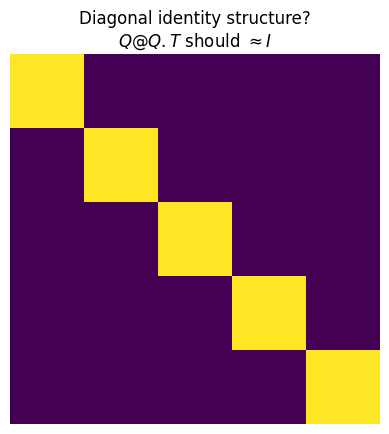

In [39]:
Q_QR, R_QR = np.linalg.qr(A)

print("Manual G-S Q and np.linalg.qr(), rounded for visual inspection:")
print(np.round(Q, 2))
print(np.round(Q_QR, 2))
print()

# Compare manual Q with NumPy's built-in QR decomposition:
print("Manual and NumPy matrices match precisely?")
Q_COMP = np.abs(np.round(Q, 13))
Q_QR_COMP = np.abs(np.round(Q_QR, 13))
print(np.allclose(Q_COMP, Q_QR_COMP))
print()

# Should be the identity matrix:
print("Manual Q @ Q.T returns the identity matrix?")
print(np.round(Q @ Q.T, 13))
print()

print("Q.T @ Q ~= ID via np.eye()?")
print(np.allclose(Q @ Q.T, np.eye(Q.shape[0])))
print()

plt.imshow(Q @ Q.T)
plt.title("Diagonal identity structure?\n$Q @ Q.T$ should $\\approx I$")
plt.axis('off')
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Outro:_**

To keep things simple, I used a square matrix. However:

-   The Gram-Schmidt procedure also applies to rectangular matrices.

-   I plan to investigating the Gram-Schmidt process on matrix shape and rank given a non-square input.

I'm also interested in exploring how NumPy implements `np.linalg.qr()`, including:

-   The differences between its `reduced` and `complete` QR decompositions.

-   The algorithms NumPy uses to make this work so effectively.

-   Dr. Cohen explains that learning Gram-Schmidt is useful, but it has limitations in real-world applications. I'm interested to learn more about how NumPy overcomes these.

I’m excited to see how these Linear Algebra concepts are used in Statistics, Machine Learning and other areas of AI.

Future versions will include animating the Gram-Schmidt Procedure column by column, step by step.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 70%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px orangered; width: 60%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 50%;">


<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website: https://www.andrewblais.dev/

</font>
